### Importing

In [2]:
# -*- coding: utf-8 -*-
from math import trunc
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime as dtt

### Loading data

In [3]:
day = 9
month = 2
year = 2014

# [0:1:0]
time_min=0
time_timestep=1
time_max=0
# [0:1:15999],
lat_min=7000
lat_timestep=1
lat_max=9000
# [0:1:35999]
lon_min=17000
lon_timestep=1
lon_max=19000
  
date =  dtt.date(year, month, day)
formatted_date = str(date).replace('-', '')


url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/{0}/{1:03d}/{2}090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc?time[{3}:{4}:{5}],lat[{6}:{7}:{8}],lon[{9}:{10}:{11}],analysed_sst[{3}:{4}:{5}][{6:d}:{7}:{8}][{9}:{10}:{11}]".format(date.year,  date.timetuple().tm_yday, formatted_date, time_min, time_timestep, time_max, lat_min, lat_timestep, lat_max, lon_min, lon_timestep, lon_max)

print('Reading via OpenDAP, {} '.format(url))
dataset = nc.Dataset(url, "r", format="NETCDF4" )

print(dataset)

Reading via OpenDAP, https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/2014/040/20140209090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc?time[0:1:0],lat[7000:1:9000],lon[17000:1:19000],analysed_sst[0:1:0][7000:1:9000][17000:1:19000] 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: CF-1.5
    title: Daily MUR SST, Final product
    summary: A merged, multi-sensor L4 Foundation SST analysis product from JPL.
    references: http://podaac.jpl.nasa.gov/Multi-scale_Ultra-high_Resolution_MUR-SST
    institution: Jet Propulsion Laboratory
    history: created at nominal 4-day latency; replaced nrt (1-day latency) version.
    comment: MUR = "Multi-scale Ultra-high Reolution"
    license: These data are available free of charge under data policy of JPL PO.DAAC.
    id: MUR-JPL-L4-GLOB-v04.1
    naming_authority: org.ghrsst
    product_version: 04.1
    uuid: 27665bc0-d5fc-11e1-9b23-080020

<ipython-input-3-151ac0f9379f>:27: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(dataset)


In [5]:
print(dataset.variables["lat"], dataset.variables["lon"], dataset.variables["analysed_sst"], sep="\n")

lats = dataset.variables["lat"][:]
lons = dataset.variables["lon"][:]

<ipython-input-5-c599d205de25>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(dataset.variables["lat"], dataset.variables["lon"], dataset.variables["analysed_sst"], sep="\n")


<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: latitude
    standard_name: latitude
    axis: Y
    units: degrees_north
    valid_min: -90.0
    valid_max: 90.0
    comment: none
unlimited dimensions: 
current shape = (2001,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: longitude
    standard_name: longitude
    axis: X
    units: degrees_east
    valid_min: -180.0
    valid_max: 180.0
    comment: none
unlimited dimensions: 
current shape = (2001,)
filling off
<class 'netCDF4._netCDF4.Variable'>
int16 analysed_sst(time, lat, lon)
    long_name: analysed sea surface temperature
    standard_name: sea_surface_foundation_temperature
    units: kelvin
    _FillValue: -32768
    add_offset: 298.15
    scale_factor: 0.001
    valid_min: -32767
    valid_max: 32767
    comment: "Final" version using Multi-Resolution Variational Analysis (MRVA) method for interpolation
    coordinates: lon lat
    source: AVHRR18_G-NAVO, AVHRR19_G-NAVO,

### Plot

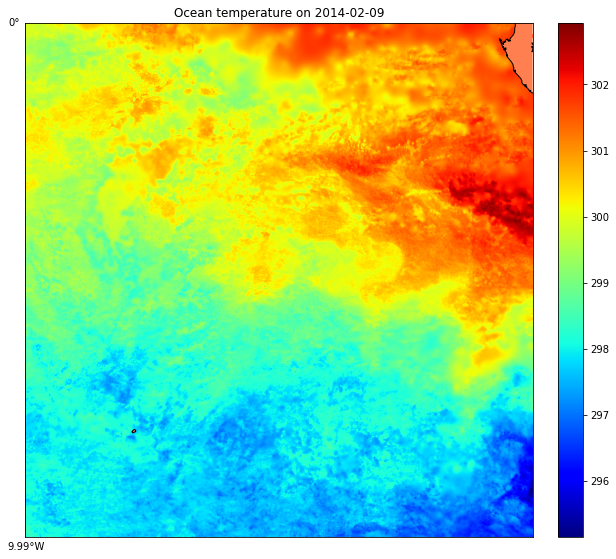

In [6]:
plt.figure(figsize=(10, 10))
mp = Basemap(projection="mill", llcrnrlon=lons.min(), urcrnrlon=lons.max(), llcrnrlat=lats.min(), urcrnrlat=lats.max(), resolution='i')
# mp = Basemap(projection='robin', lon_0=0, resolution='c')

lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

color_scheme = mp.pcolormesh(x, y, np.squeeze(dataset.variables["analysed_sst"][:]), cmap = 'jet', shading='auto')

mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
mp.drawmeridians(np.arange(mp.lonmin,mp.lonmax+30,60),labels=[0,0,0,1])

mp.fillcontinents(color='coral',lake_color='aqua')

color_bar = mp.colorbar(color_scheme, location='right', pad="5%")

plt.title("Ocean temperature on {}".format(date))
plt.show()

dataset.close()